### Importing Libraries

In [1]:
# Libray for Data Manipulation.
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.2)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .5)

# Library to overcome Warnings.
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [2]:
df = pd.read_excel('train.xlsx')

### Inspecting Dataset

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# getting general information regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Statistical Information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
#shape of dataset
df.shape

(10683, 11)

In [7]:
# duplicates in dataset
df.duplicated().sum()

220

In [8]:
#drop the duplicates
df.drop_duplicates(keep='first',inplace=True)

In [9]:
#shape of dataset after droppinfg duplicates
df.shape

(10463, 11)

In [10]:
# null values in dataset
null_counts = df.isnull().sum().sort_values(ascending = False)
null_percentages = round((null_counts/len(df))*100,2)
null_summary = pd.concat([null_counts, null_percentages], axis=1)
null_summary.columns = ['Null_Count', 'Null_%']
null_summary

,Null_Count,Null_%
Route,1,0.01
Total_Stops,1,0.01
Airline,0,0.00
Date_of_Journey,0,0.00
Source,0,0.00
Destination,0,0.00
Dep_Time,0,0.00
Arrival_Time,0,0.00
Duration,0,0.00
Additional_Info,0,0.00


There is one null values in 'Route' & 'Total_Stops' column.  

In [11]:
#drop the nullvalues
df.dropna(inplace=True)

In [12]:
#shape of dataset after droppinfg null value
df.shape

(10462, 11)

### Unique Value in Columns

In [13]:
# List of columns to exclude from checking unique values
columns_to_exclude = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Price' , 'Route']

# Initialize a dictionary to store unique values for each column
unique_values = {}

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the current column should be excluded
    if column not in columns_to_exclude:
        # Calculate the unique values for the current column
        unique_vals = df[column].unique()
        
        # Store the result in the dictionary with the column name as the key
        unique_values[column] = unique_vals

# Print the unique values for each column (excluding the specified columns)
for column, values in unique_values.items():
    print(f"Column '{column}':\n{values}\n{'*' * 50}\n")   # Add the divider '*'

Column 'Airline':
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
**************************************************

Column 'Source':
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
**************************************************

Column 'Destination':
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
**************************************************

Column 'Total_Stops':
['non-stop' '2 stops' '1 stop' '3 stops' '4 stops']
**************************************************

Column 'Additional_Info':
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
**************************************************



### Unique Value Counts in Columns

In [14]:
# Columns to exclude
columns_to_exclude = ['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Price' , 'Route']

# Initialize a dictionary to store unique value counts for each column
unique_counts = {}

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the current column should be excluded
    if column not in columns_to_exclude:
        # Calculate the unique value counts for the current column
        unique_count = df[column].value_counts()
        
        # Store the result in the dictionary with the column name as the key
        unique_counts[column] = unique_count

# Print the unique value counts for each column (excluding the specified columns) with a divider '*'
for column, counts in unique_counts.items():
    print(f"Column '{column}':\n{counts}\n{'*' * 50}\n")  # Add the divider '*'

Column 'Airline':
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
**************************************************

Column 'Source':
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64
**************************************************

Column 'Destination':
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
**************************************************

Col

### Data PreProcessing & Feature Extraction

In [15]:
#converting Total_stops from object to int
df['Total_Stops'] = df["Total_Stops"].str.replace('non-stop','0')
df['Total_Stops'] = df["Total_Stops"].str.replace('stops','')
df['Total_Stops'] = df["Total_Stops"].str.replace('stop','')
df['Total_Stops'] = df["Total_Stops"].str.replace(' ','')
df['Total_Stops'] = df["Total_Stops"].astype(int)

#merging 'New Delhi' with 'Delhi' in destination column (name of same city)
df['Destination'] = np.where(df['Destination']=="New Delhi","Delhi",df['Destination'])

#merging trujet into multiple carrier - only single entry for Trujet
df['Airline'] = np.where(df['Airline']=="Trujet","Multiple carriers",df['Airline'])

#merging business class with econony class - few data available for business class
df['Airline'] = np.where(df['Airline']=="Jet Airways Business","Jet Airways",df['Airline'])
df['Airline'] = np.where(df['Airline']=="Vistara Premium economy","Vistara",df['Airline'])
df['Airline'] = np.where(df['Airline']=="Multiple carriers Premium economy","Multiple carriers",df['Airline'])


In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [17]:
#dropping 'Additional_Info' - there is no info available for almost 70% data
#dropping 'Route' - we have info available on Total_Stops, Source and Destination City


df = df.drop(['Additional_Info', 'Route'], axis = 1)

In [18]:
#coverting 'Duration' from hh:mm to hh
df['Duration'] = df['Duration'].str.replace('h','*1').str.replace(' ','+').str.replace('m','/60').apply(eval)

In [19]:
# Round the values in the ''Duration' column to 2 decimal points
df['Duration'] = df['Duration'].apply(lambda x: round(x, 2))

In [20]:
#Extracting 'Year', 'Month' and 'Day' and 'Weekday' value form 'Date_of_Journey' Column

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['day'] = pd.DatetimeIndex(df['Date_of_Journey']).day
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['weekday'] = pd.DatetimeIndex(df['Date_of_Journey']).weekday

In [21]:
#dropping 'Date_of_Journey' Column since we have extracted necessary features from it.
df = df.drop(['Date_of_Journey'], axis = 1)

In [22]:
# List of columns to include for checking unique values
columns_to_include = ['day', 'month', 'year', 'weekday']

# Initialize a dictionary to store unique values for each column
unique_values = {}

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the current column should be excluded
    if column in columns_to_include:
        # Calculate the unique values for the current column
        unique_vals = df[column].unique()
        
        # Store the result in the dictionary with the column name as the key
        unique_values[column] = unique_vals

# Print the unique values for each column (excluding the specified columns)
for column, values in unique_values.items():
    print(f"Column '{column}':\n{values}\n{'*' * 50}\n")   # Add the divider '*'

Column 'day':
[24  5  6  3 27 18 15 21  4]
**************************************************

Column 'month':
[ 3  1  9 12  6  5  4]
**************************************************

Column 'year':
[2019]
**************************************************

Column 'weekday':
[6 5 4 3 0 1 2]
**************************************************



In [23]:
#since their is only single value in 'year' column, we can drop it
df = df.drop(['year'], axis = 1)

In [24]:
#converting 'Dep_Time' & 'Arrival_Time' into datetime 
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [25]:
# function for extracting hour and minutes seperately into column
def extract_hour(data,col):
    data[col+'_Hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_Min']=data[col].dt.minute

In [26]:
#extracting hours and minutes  from 'Dep_Time' & 'Arrival_Time'
#departure time is when a plane leaves the gate. 

#extracting hours 
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#extracting hours 
extract_hour(df,'Arrival_Time')

#extracting minutes
extract_min(df,'Arrival_Time')

In [27]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,Delhi,2023-10-23 22:20:00,2023-03-22 01:10:00,2.83,0,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,2023-10-23 05:50:00,2023-10-23 13:15:00,7.42,2,7662,5,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2023-10-23 09:25:00,2023-06-10 04:25:00,19.00,2,13882,6,9,4,9,25,4,25
3,IndiGo,Kolkata,Banglore,2023-10-23 18:05:00,2023-10-23 23:30:00,5.42,1,6218,5,12,3,18,5,23,30
4,IndiGo,Banglore,Delhi,2023-10-23 16:50:00,2023-10-23 21:35:00,4.75,1,13302,3,1,3,16,50,21,35


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10462 non-null  object        
 1   Source             10462 non-null  object        
 2   Destination        10462 non-null  object        
 3   Dep_Time           10462 non-null  datetime64[ns]
 4   Arrival_Time       10462 non-null  datetime64[ns]
 5   Duration           10462 non-null  float64       
 6   Total_Stops        10462 non-null  int32         
 7   Price              10462 non-null  int64         
 8   day                10462 non-null  int64         
 9   month              10462 non-null  int64         
 10  weekday            10462 non-null  int64         
 11  Dep_Time_Hour      10462 non-null  int64         
 12  Dep_Time_Min       10462 non-null  int64         
 13  Arrival_Time_Hour  10462 non-null  int64         
 14  Arriva

In [29]:
df['Dep_Time'] = df['Dep_Time'].dt.strftime('%H:%M')
df['Arrival_Time'] = df['Arrival_Time'].dt.strftime('%H:%M')

In [30]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day,month,weekday,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,Delhi,22:20,01:10,2.83,0,3897,24,3,6,22,20,1,10
1,Air India,Kolkata,Banglore,05:50,13:15,7.42,2,7662,5,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25,19.00,2,13882,6,9,4,9,25,4,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5.42,1,6218,5,12,3,18,5,23,30
4,IndiGo,Banglore,Delhi,16:50,21:35,4.75,1,13302,3,1,3,16,50,21,35


In [31]:
#creating function to categorize 'Arrival_Time' and 'Dep_Time'
def categorize_time(time_str):
    time = pd.to_datetime(time_str, format='%H:%M').time()
    
    if time >= pd.to_datetime('08:00', format='%H:%M').time() and time < pd.to_datetime('12:00', format='%H:%M').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00', format='%H:%M').time() and time < pd.to_datetime('16:00', format='%H:%M').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('16:00', format='%H:%M').time() and time < pd.to_datetime('20:00', format='%H:%M').time():
        return 'Evening'
    elif time >= pd.to_datetime('20:00', format='%H:%M').time() and time <= pd.to_datetime('23:59', format='%H:%M').time():
        return 'Night'
    elif time >= pd.to_datetime('00:00', format='%H:%M').time() and time < pd.to_datetime('04:00', format='%H:%M').time():
        return 'Late_Night'
    else:
        return 'Early_Morning'

In [32]:
df['Dep_Time_Category'] = df['Dep_Time'].apply(categorize_time)

In [33]:
df['Arrival_Time_Category'] = df['Arrival_Time'].apply(categorize_time)

In [34]:
#Checking for Unique values in 'Dep_Time_Category' & 'Arrival_Time_Category'

# Columns to exclude
columns_to_include = ['Dep_Time_Category', 'Arrival_Time_Category']

# Initialize a dictionary to store unique value counts for each column
unique_counts = {}

# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the current column should be excluded
    if column in columns_to_include:
        # Calculate the unique value counts for the current column
        unique_count = df[column].value_counts()
        
        # Store the result in the dictionary with the column name as the key
        unique_counts[column] = unique_count

# Print the unique value counts for each column (excluding the specified columns) with a divider '*'
for column, counts in unique_counts.items():
    print(f"Column '{column}':\n{counts}\n{'*' * 50}\n")  # Add the divider '*'

Column 'Dep_Time_Category':
Morning          2686
Early_Morning    2289
Evening          2135
Night            1644
Afternoon        1413
Late_Night        295
Name: Dep_Time_Category, dtype: int64
**************************************************

Column 'Arrival_Time_Category':
Evening          2624
Night            2205
Morning          1728
Afternoon        1640
Early_Morning    1292
Late_Night        973
Name: Arrival_Time_Category, dtype: int64
**************************************************



### Exploratory Data Analysis

### Univariate Analysis

In [35]:
def count_plot(data, x_column):
    counts = data[x_column].value_counts().sort_values(ascending=False)
    custom_palette = sns.color_palette('Set2', len(counts))
    plt.figure(figsize=(13, 7))
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel=x_column, fontsize=14, fontweight='bold', color='#333333')
    
    ax = sns.countplot(data=data, x=x_column, order=counts.index, palette=custom_palette)

    total = len(data[x_column])
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(f'{count}\n({percentage:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')

    sns.despine()
    plt.tight_layout()
    plt.show()

#### 1. Analysis of Airline

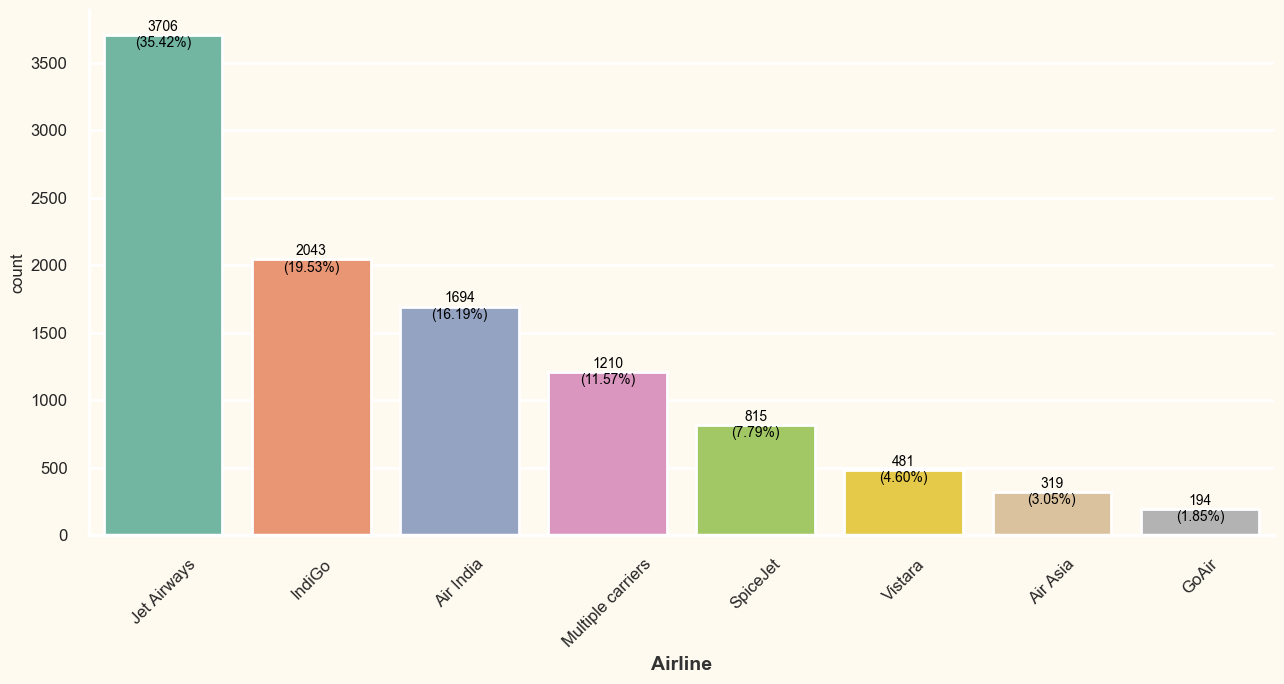

In [36]:
count_plot(df, x_column='Airline')

Inference:

Jet Airways is the most frequently used Airline, followed by Indigo.    

#### 2. Analysis by Total Stops

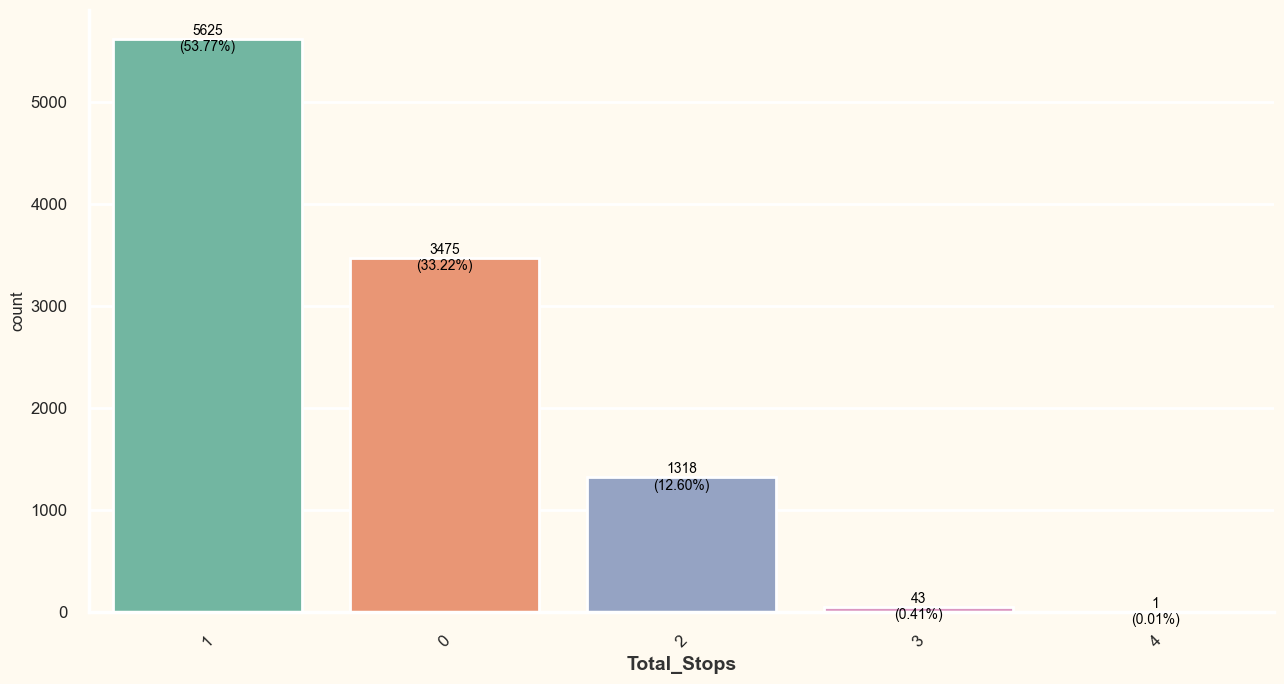

In [37]:
count_plot(df, x_column='Total_Stops')

Inference:

Majority of Airlines(~54%) have one stop only.  

#### 3. Analysis by Source

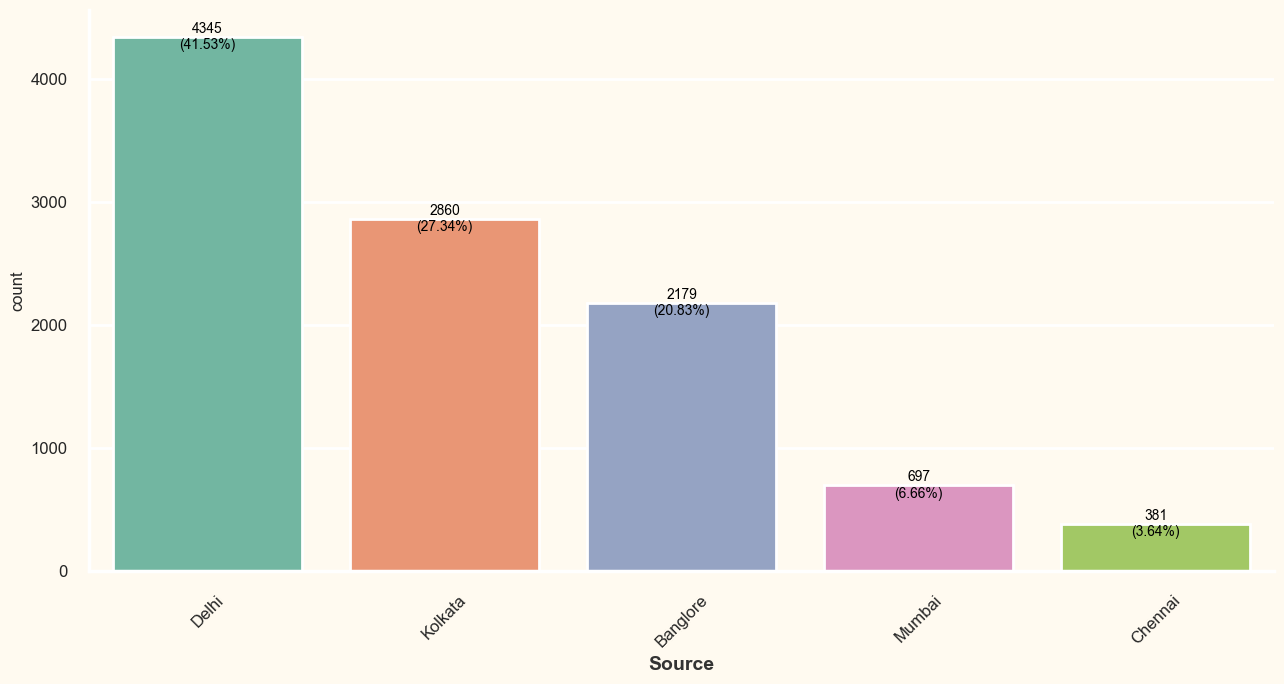

In [38]:
count_plot(df, x_column='Source')

Inference:

Delhi is the place from where majority of flight departs (~42%)

#### 4. Analysis by Destination

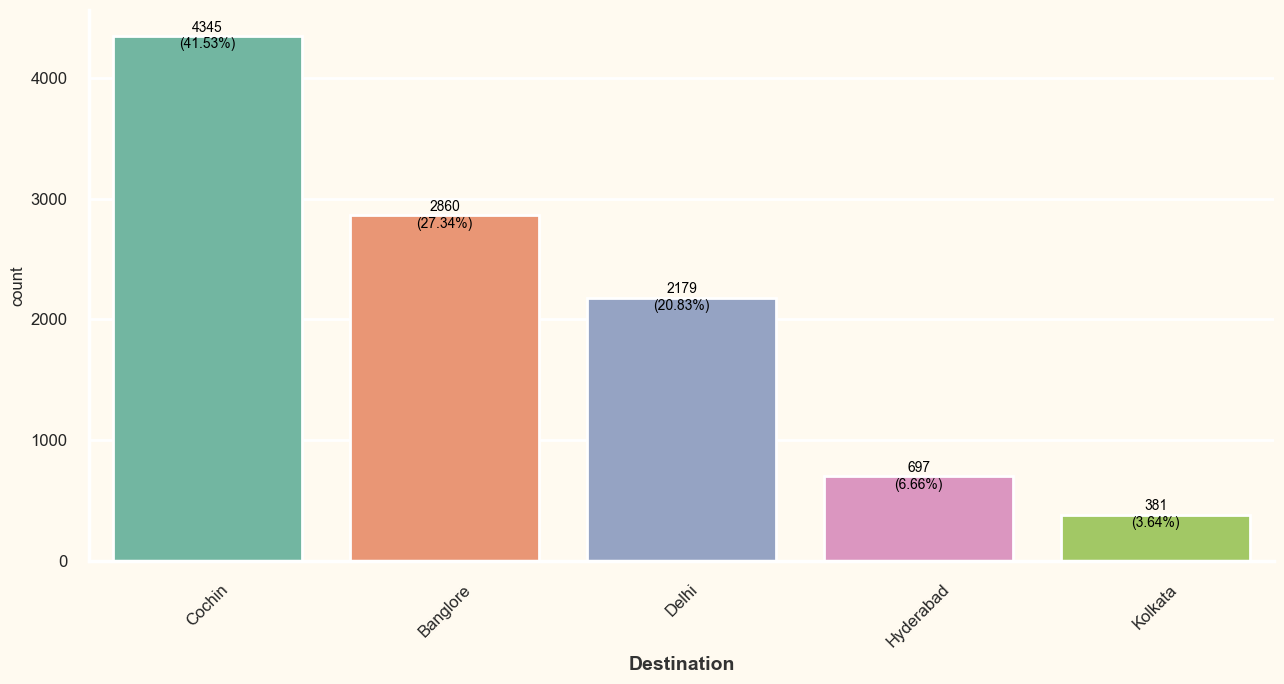

In [39]:
count_plot(df, x_column='Destination')

Inference:

Cochin is the destination for most flight (~42%)

#### 5. Analysis by Departurer Time

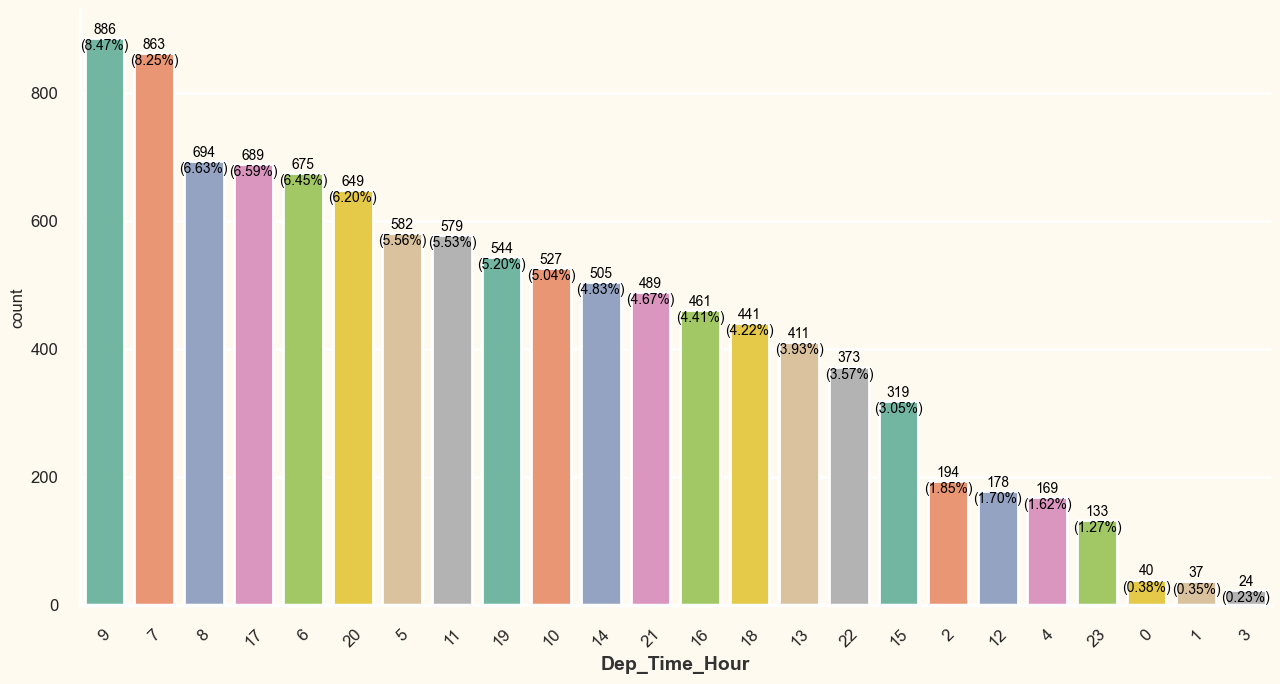

In [40]:
count_plot(df, x_column='Dep_Time_Hour')

#### Grouping Departure time 

Time  between 08:00 (inclusive) and 12:00 (exclusive), it categorizes it as 'Morning'.  
Time  between 12:00 (inclusive) and 16:00 (exclusive), it categorizes it as 'Afternoon'.  
Time  between 16:00 (inclusive) and 20:00 (exclusive), it categorizes it as 'Evening'.  
Time  between 20:00 (inclusive) and 23:59 (inclusive), it categorizes it as 'Night'.  
Time  between 00:00 (inclusive) and 04:00 (exclusive), it categorizes it as 'Late_Night'.  
Time  between 04:00 (inclusive) and 08:00 (exclusive), it categorizes it as 'Early_Morning'.  

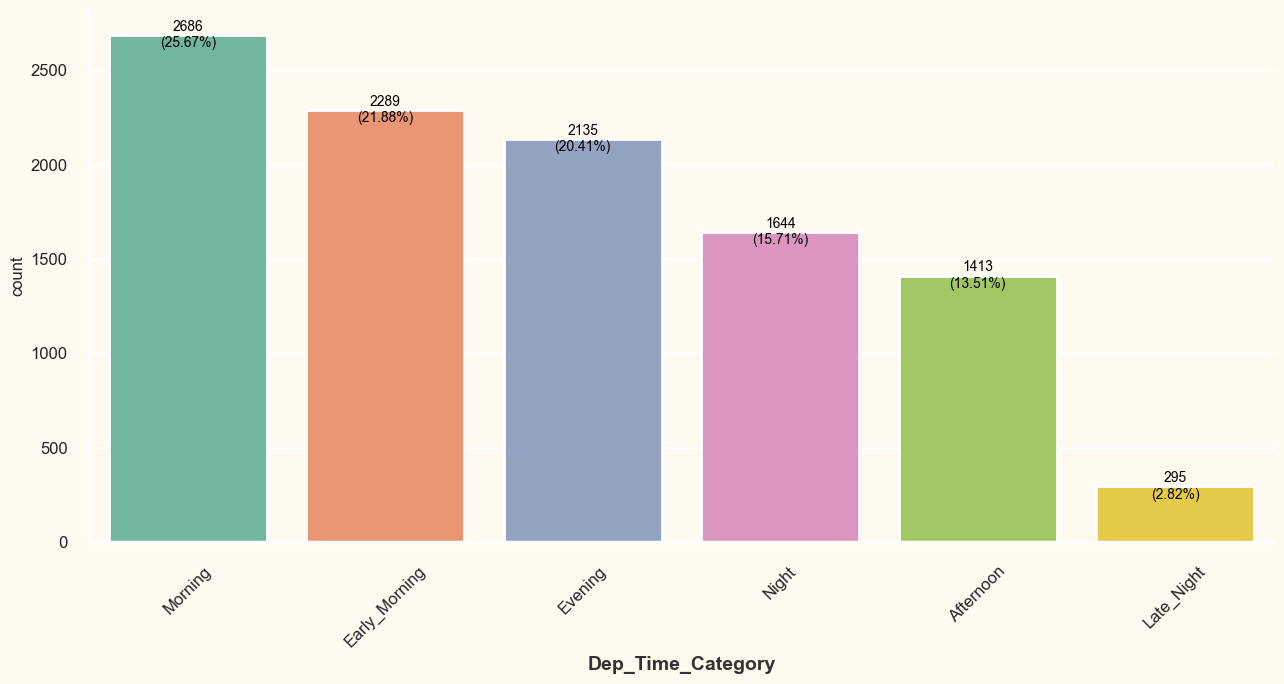

In [41]:
count_plot(df, x_column='Dep_Time_Category')

Inference:

Majority of flight departs between 08:00 AM to 12:00 PM (~26%)

#### 6. Analysis by Arrival Time

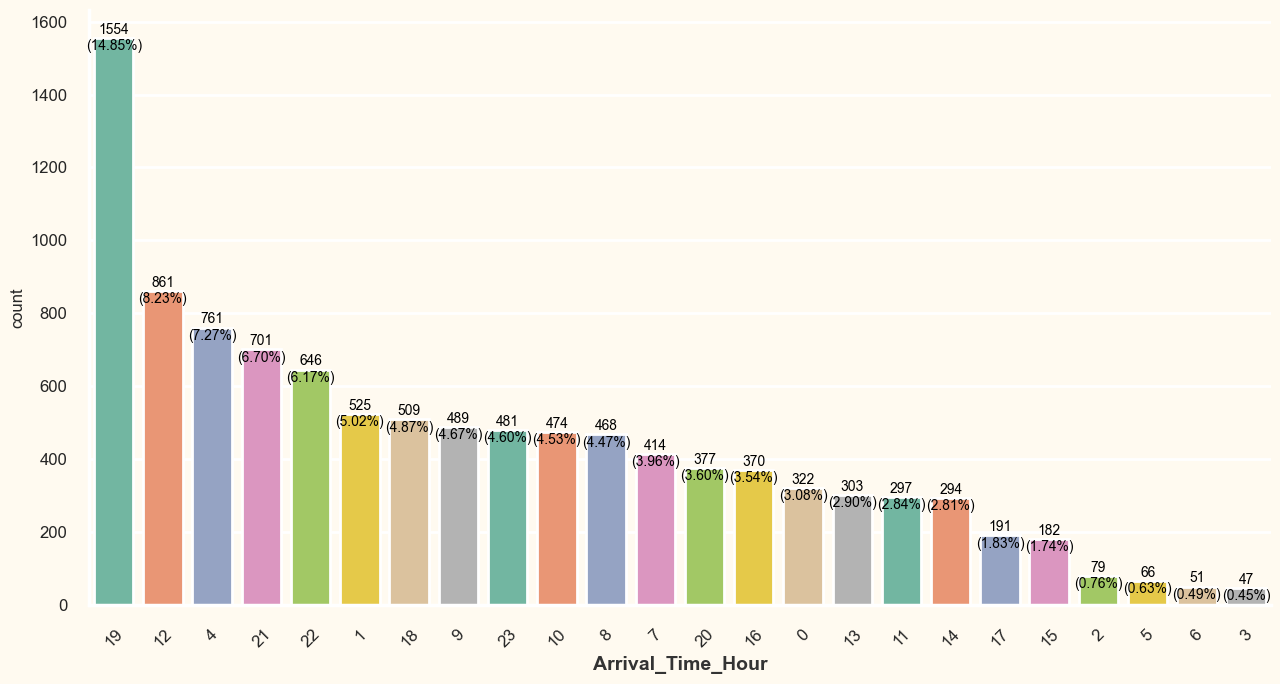

In [42]:
count_plot(df, x_column='Arrival_Time_Hour')

#### Arrival Time Category

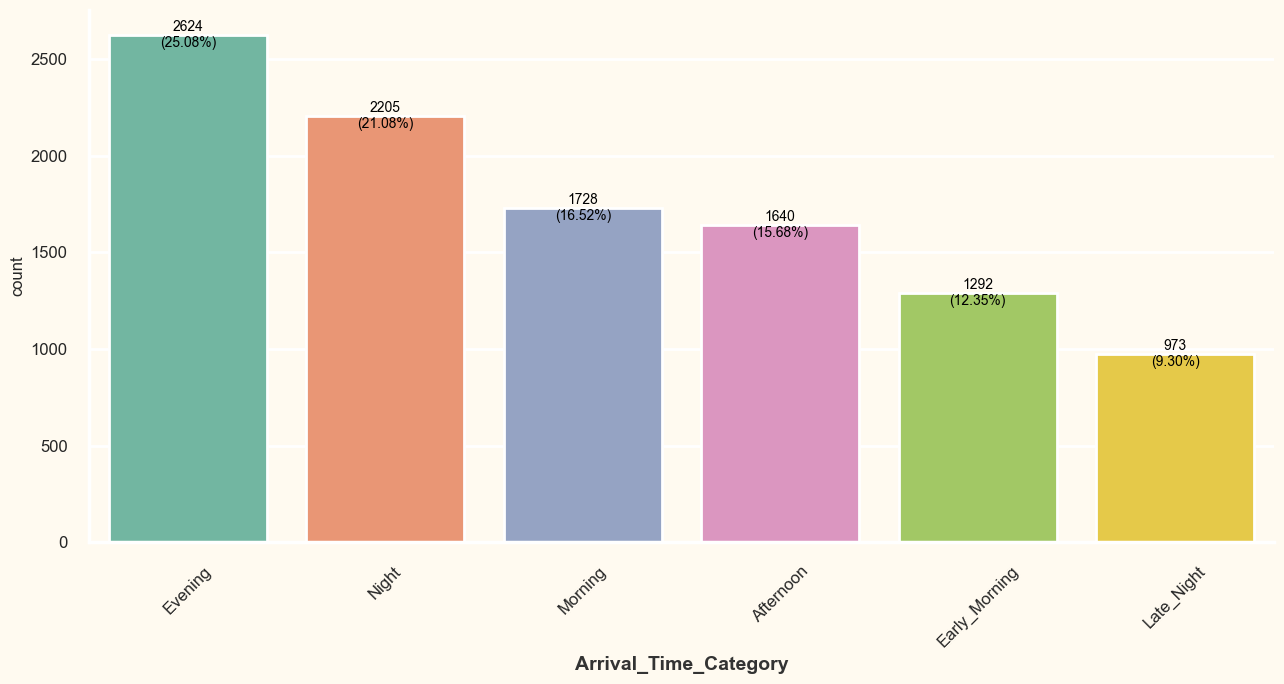

In [43]:
count_plot(df, x_column='Arrival_Time_Category')

Inference: 

Majority of flights lands in the evening time (25%)

#### 7. Analysis by Month

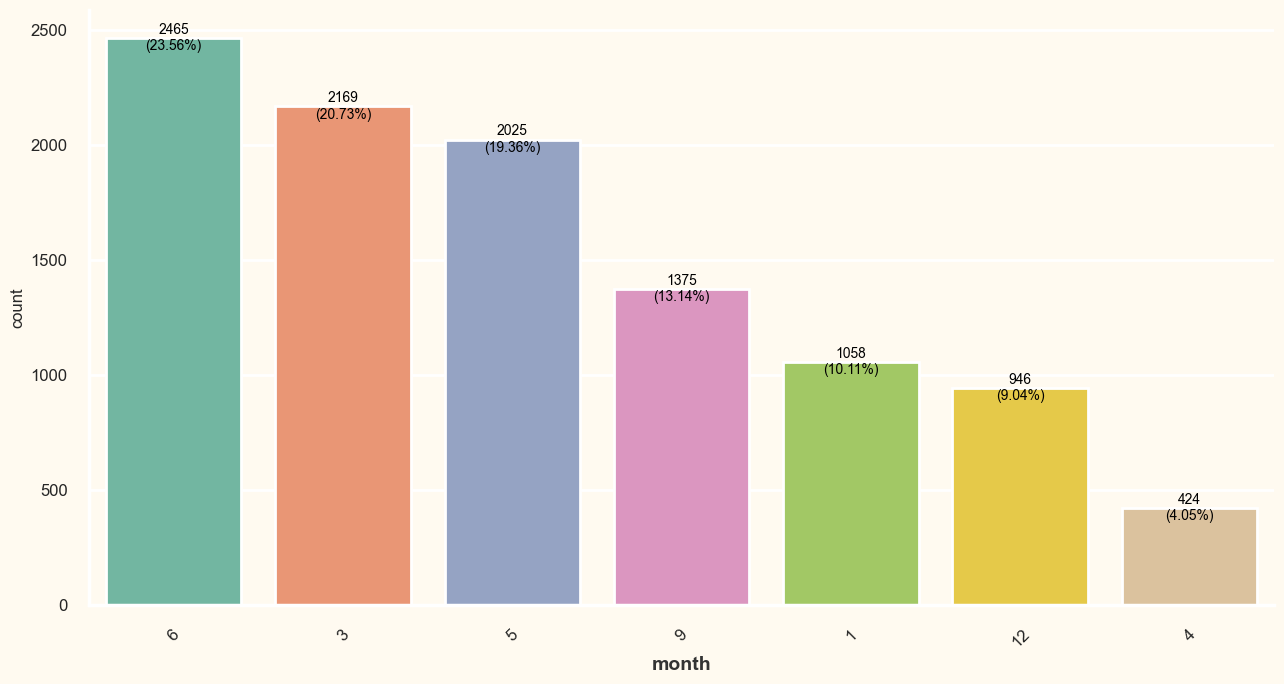

In [44]:
count_plot(df, x_column='month')

Inference:

Highest number of flight are in June(23.5%), followed by March(20.7%) and May(19.36%).  

#### 8. Analysis by Weekday

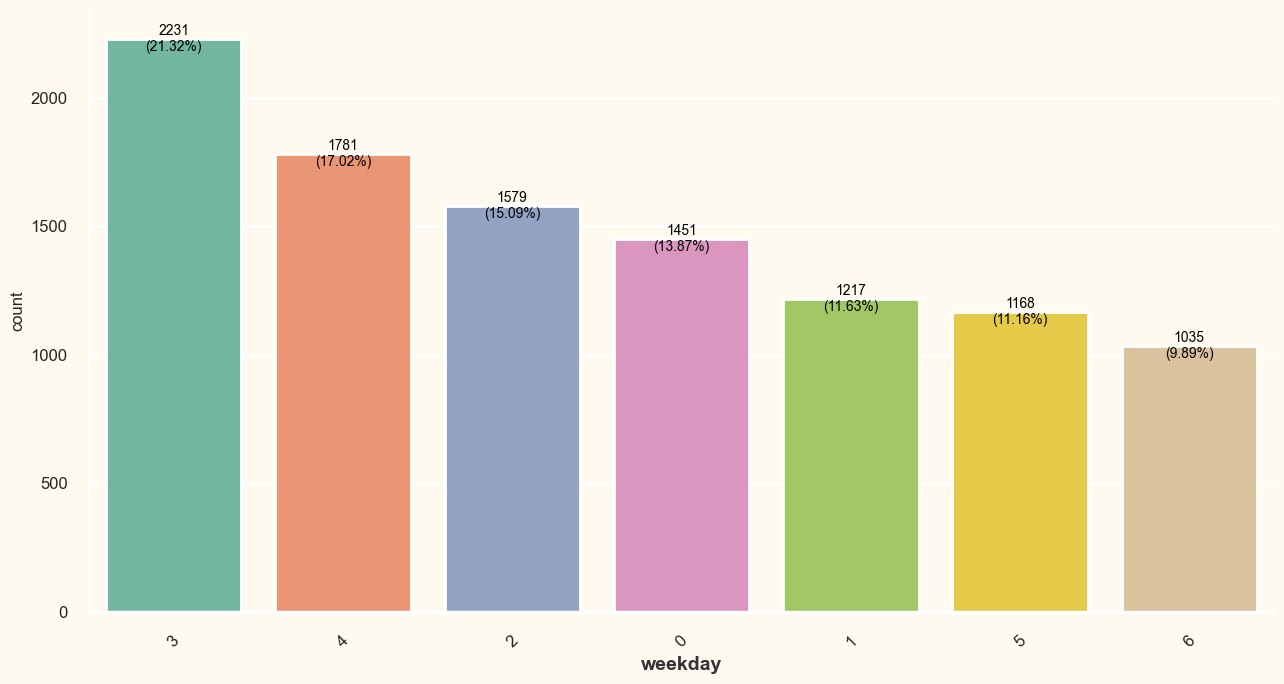

In [45]:
count_plot(df, x_column='weekday')

Inference:

Maximum number of flight are on Wednesday(21.3%), Thursday(17%) & Tuesday(15%)

#### 9. Analysis by Flight Day

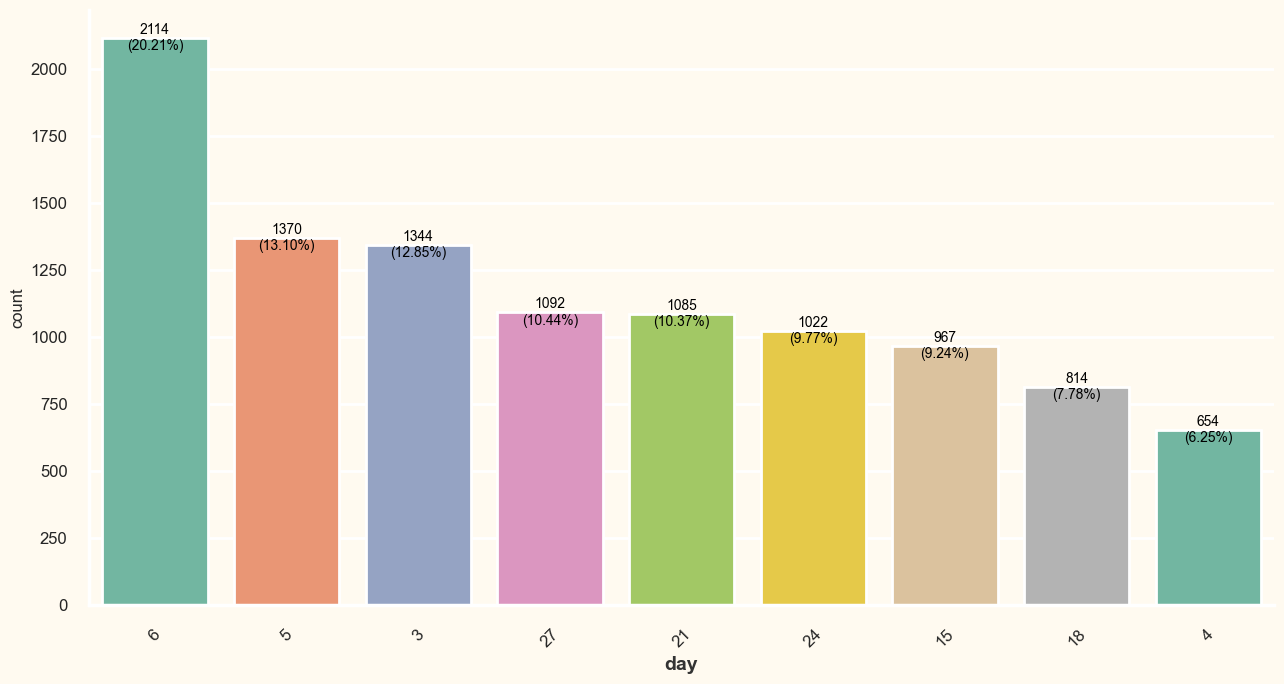

In [46]:
count_plot(df, x_column='day')

Inference:

Majority of flight are on 6th and 5th day of the month

In [47]:
def dist_box_plot(df, col):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col], kde=True)
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

#### 10. Analysis by Flight Price

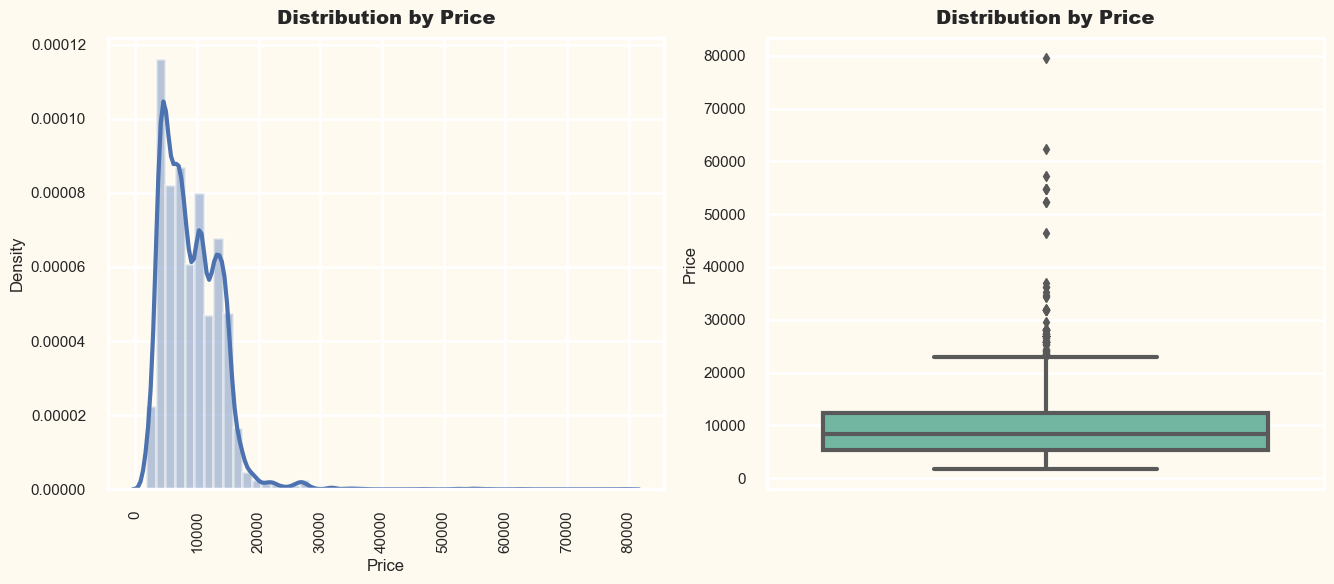

In [48]:
dist_box_plot(df, 'Price')

Inference:

1. From the histplot, we can say that the 'Price' variable is right-skewed.    
2. From the boxplot we can say that there are outliers present in the 'Price' variable.  

### Bivariate Analysis

#### 1. Average Price based on Flight Duration

In [49]:
#Let's see how the duration of the flight may affect the final price.

df_temp = df.groupby(['Duration'])['Price'].mean().reset_index()

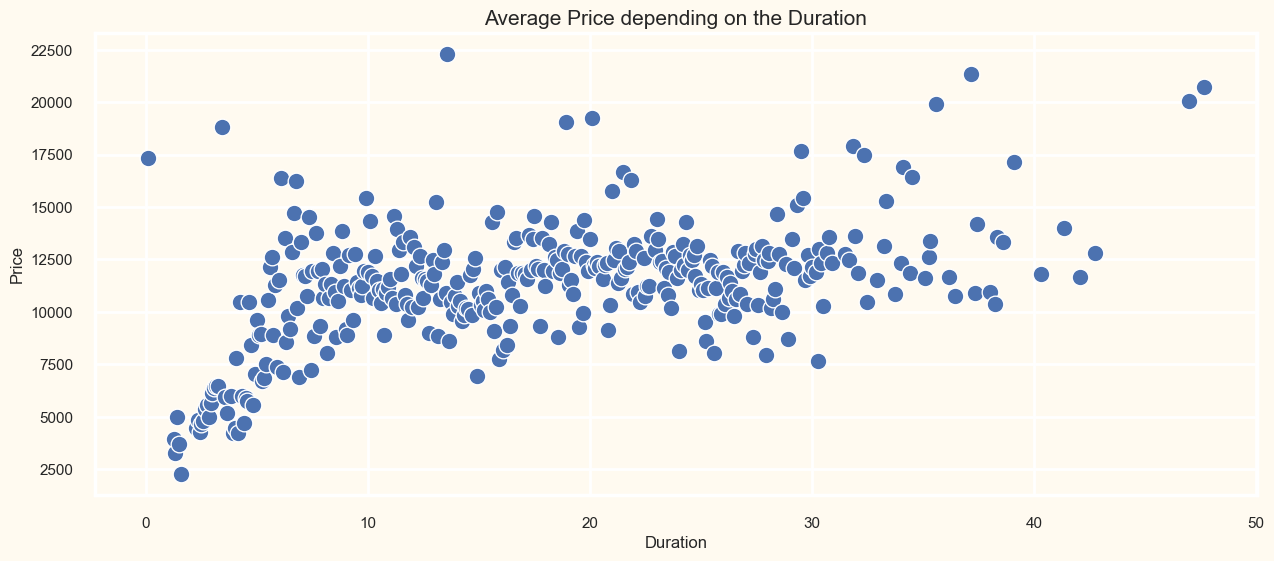

In [50]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration", y="Price", data=df_temp).set_title("Average Price depending on the Duration",fontsize=15)

Inference:

1. Flight price increses steeply as flight duration increases till 10 hours.    
2. From 10 hours onwards the increase in flight price is steady.  

#### 2. Analysis of Flight Price based on Arrival and Departure Time

Text(0.5, 1.0, 'Airline Prices based on the Arrival Time')

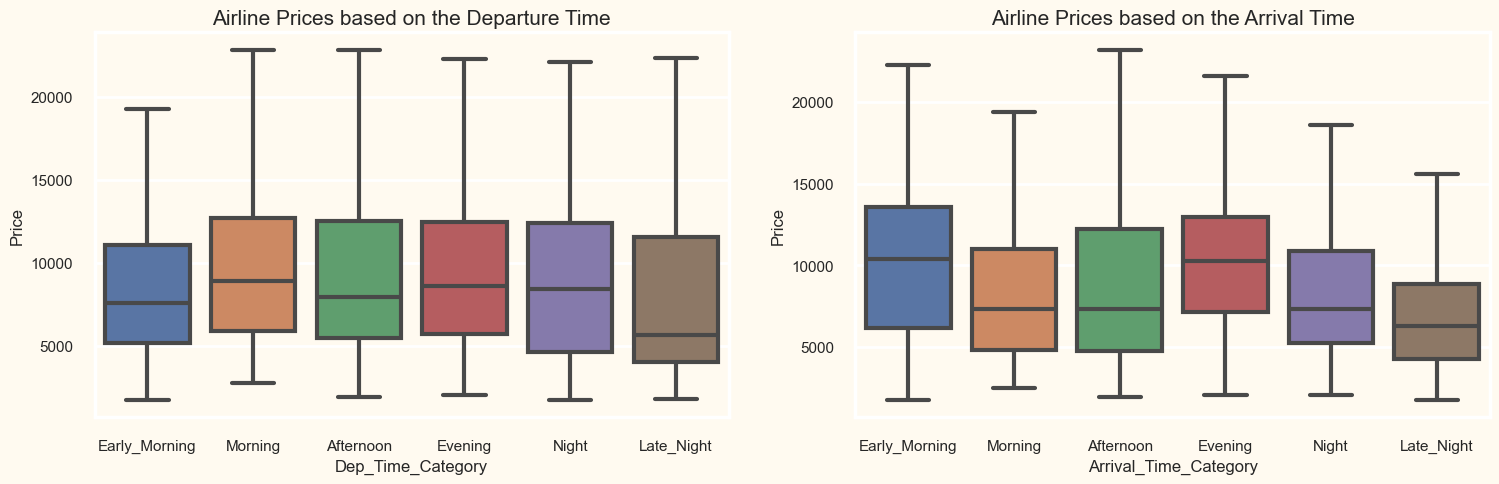

In [51]:
flight_order = ["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Price", x="Dep_Time_Category",showfliers=False, order = flight_order).set_title("Airline Prices based on the Departure Time", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Price", x="Arrival_Time_Category",showfliers=False, order = flight_order).set_title("Airline Prices based on the Arrival Time", fontsize=15)

Inference:

Early Morning Departure flight and Late Night Arrival flight are cheaper.

#### 3. Analysis of Flight Price based on Source and Destination City

Text(0.5, 1.0, 'Airline Prices based on the Destination City')

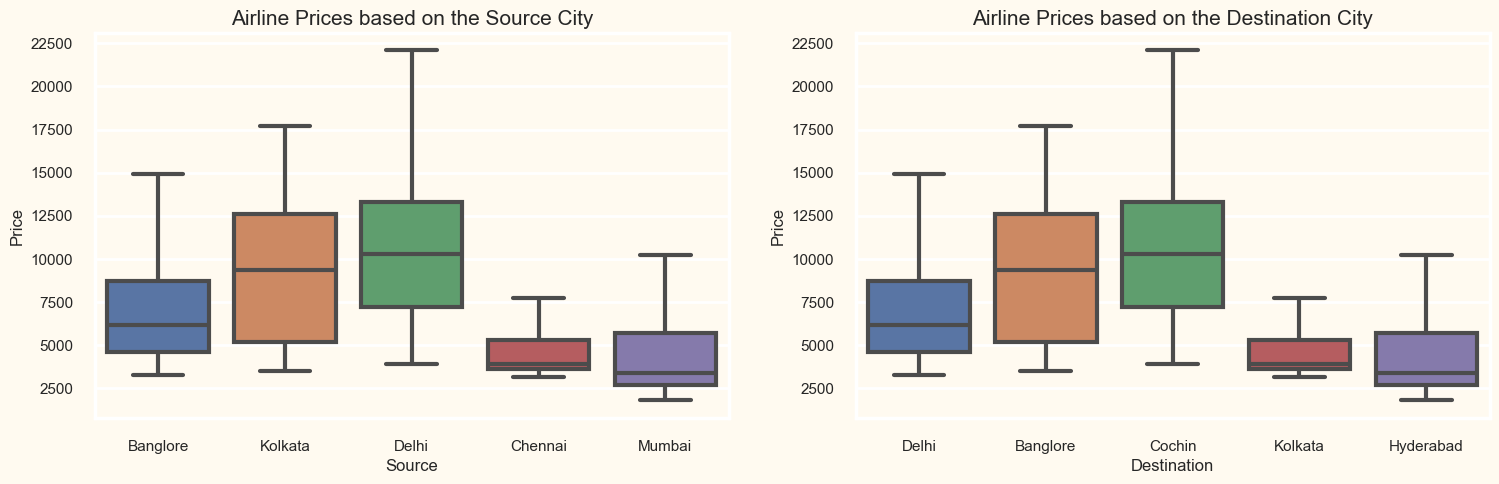

In [52]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="Price", x="Source",showfliers=False).set_title("Airline Prices based on the Source City", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="Price", x="Destination",showfliers=False).set_title("Airline Prices based on the Destination City", fontsize=15)

Inferene: 

1. Source City:  
a)Ticket price is low for flight having source city as Mumbai.    
b)Ticket price is high for flight having source city as Delhi.  


2. Destination City:  
a)Ticket price is low for flight having destination city as Kilkata.      
b)Ticket price is high for flight having destination city as Cochin.  

#### 4. Analysis of Flight Price based on Number of Stops

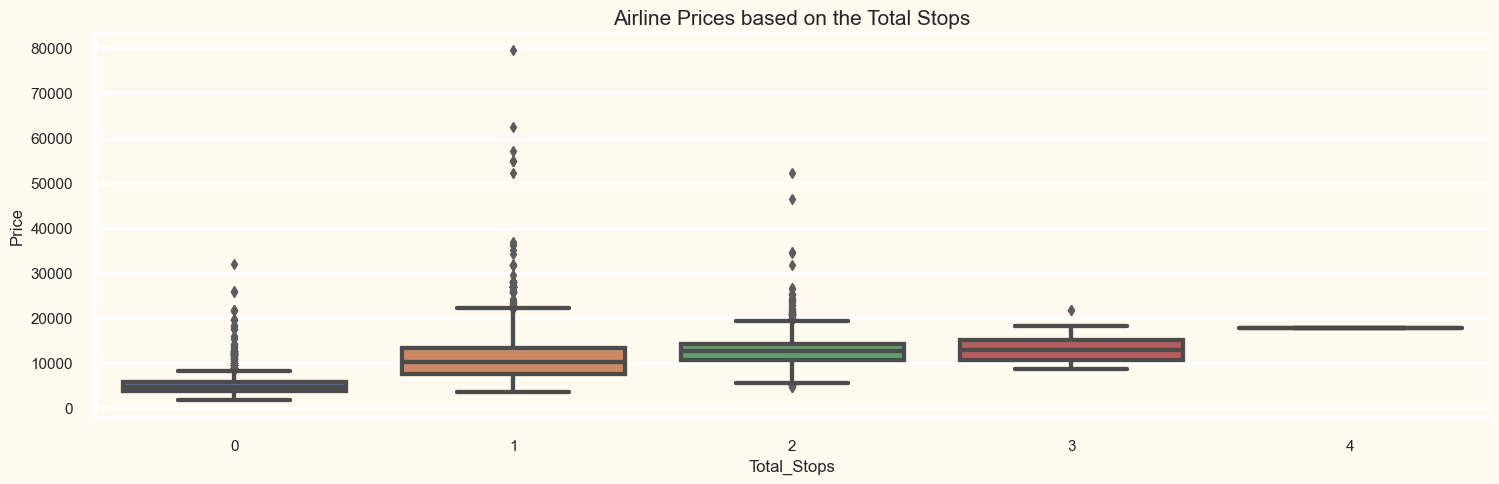

In [53]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Total_Stops',y='Price',data=df,palette='hls')
sns.boxplot(data=df, y="Price", x="Total_Stops",showfliers=False).set_title("Airline Prices based on the Total Stops", fontsize=15)
plt.show()

Inference:

Flight with No Stops are Cheaper  
As the no. of stops increase, flight price also increases

#### 5. analysis of Flight Price based on Airlines

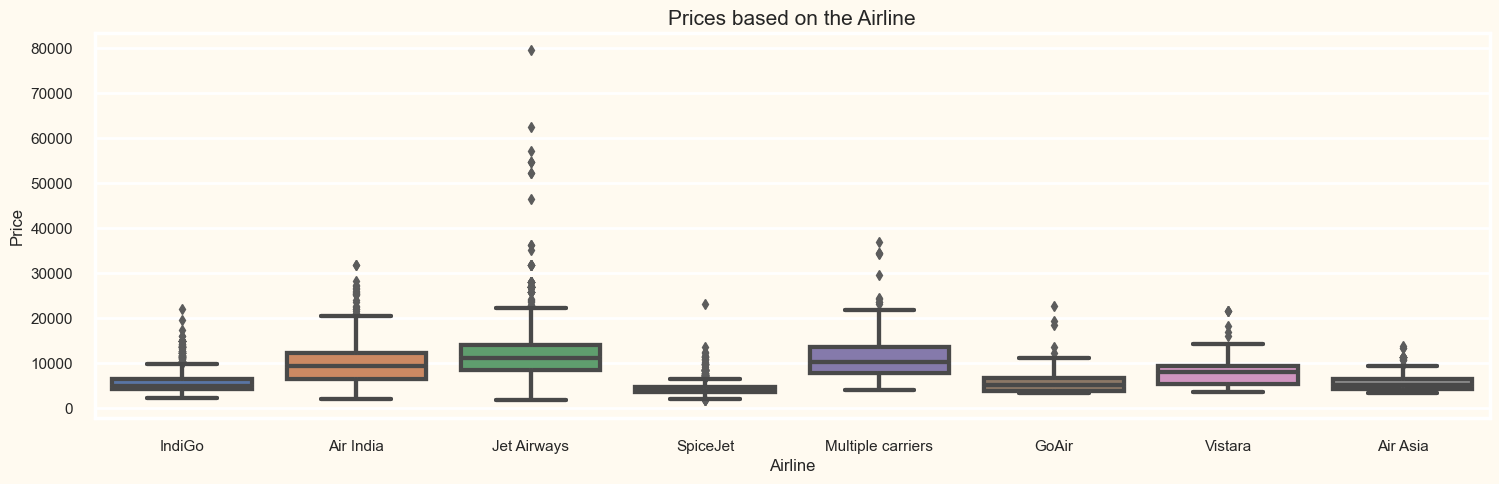

In [54]:
plt.figure(figsize=(18,5))
sns.boxplot(x='Airline',y='Price',data=df,palette='hls')
sns.boxplot(data=df, y="Price", x="Airline",showfliers=False).set_title("Prices based on the Airline", fontsize=15)
plt.show()

Inference:

1. Jet Airways has maximum price range, followed by Air India.    
2. Indigo, GoAir and Vistara has same price range.    

#### 6. Analysis of Average Price of different Airlnes from Source city to Destination city

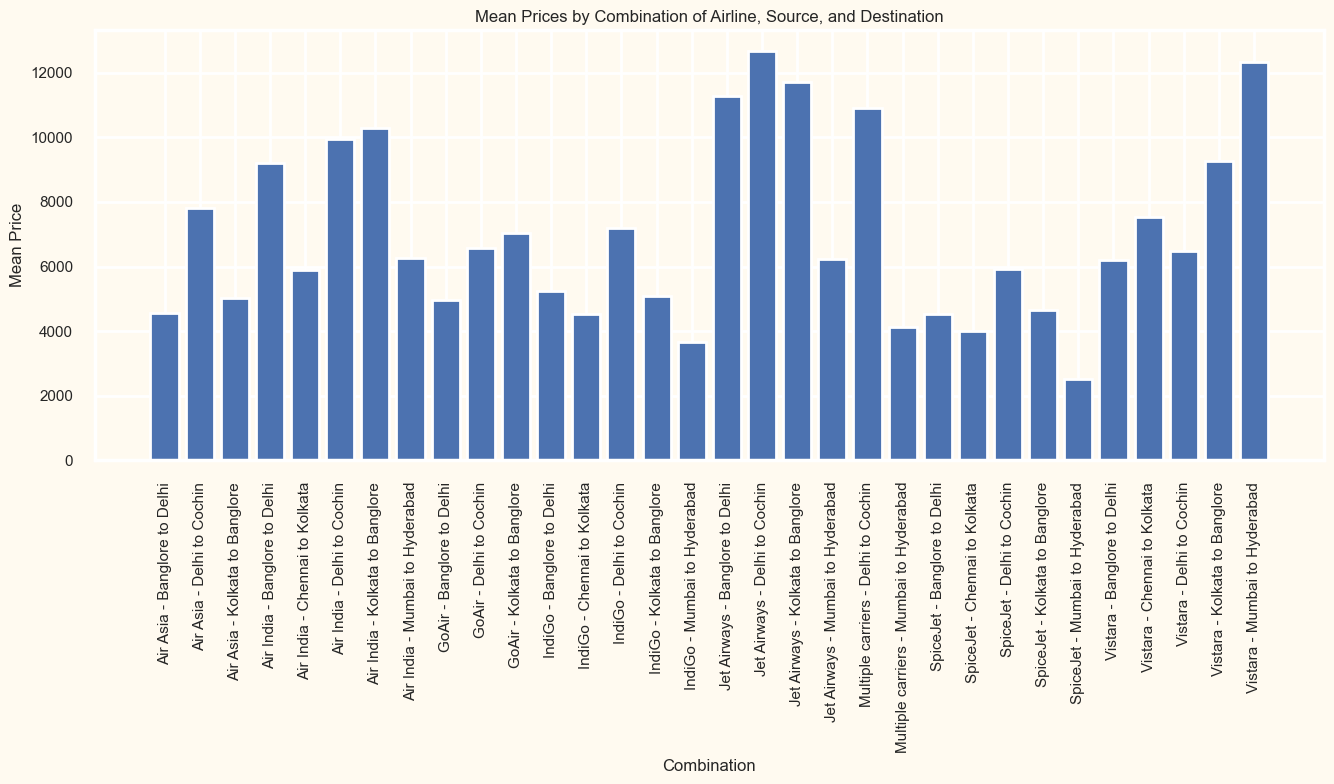

In [55]:
mean_prices = df.groupby(['Airline', 'Source', 'Destination'], as_index=False)['Price'].mean()

# Create a bar plot
plt.figure(figsize=(13.5, 8))  # Adjust the figure size as needed
plt.bar(mean_prices.index, mean_prices['Price'])
plt.xlabel('Combination')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Combination of Airline, Source, and Destination')
plt.xticks(mean_prices.index, [f'{row["Airline"]} - {row["Source"]} to {row["Destination"]}' for _, row in mean_prices.iterrows()], rotation=90)
plt.tight_layout()
plt.show()

### Handling Outliers - Using IQR Method

In [56]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [57]:
df['Price'] = np.where(df['Price'] > upper_limit, upper_limit,
                                       np.where(df['Price'] < lower_limit, 
                                                lower_limit, df['Price']))

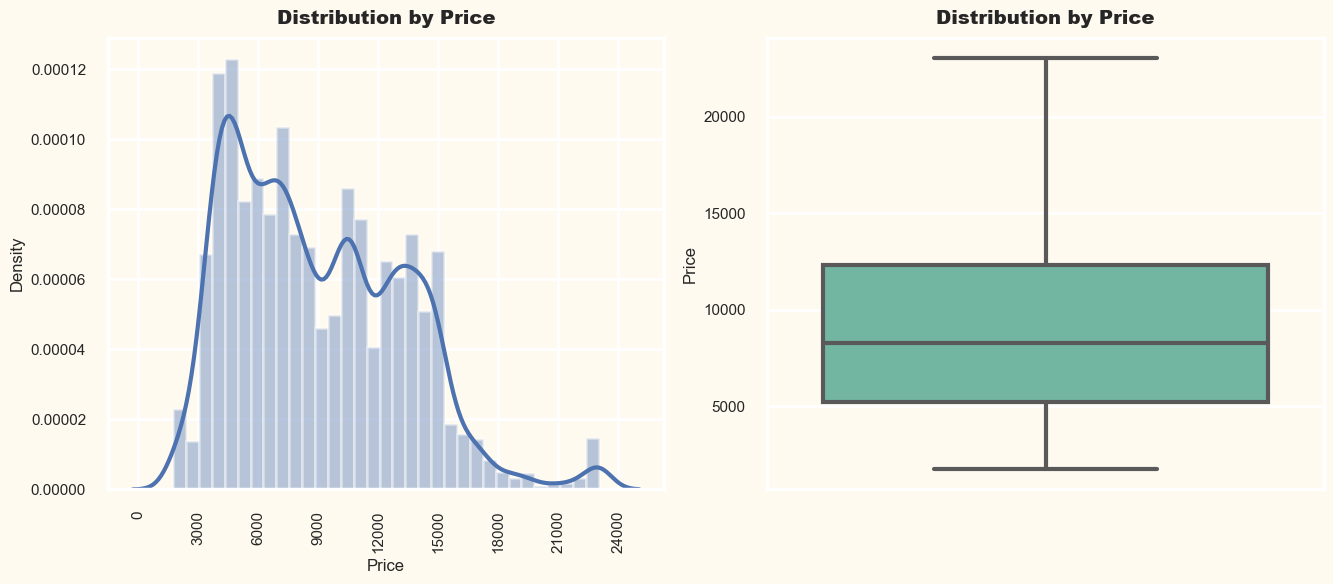

In [58]:
dist_box_plot(df, 'Price')

Inference:

We have capped the outliers using 'IQR' Method  

### Droping the Features not required in our analysis further

In [59]:
#droping 'Dep_Time', 'Arrival_Time', 'Dep_Time_Category', 'Arrival_Time_Category' 
#since we have already extrcted the required features
df = df.drop(['Dep_Time', 'Arrival_Time', 'Dep_Time_Category', 'Arrival_Time_Category' ], axis = 1)

### Encoding

In [60]:
#One Hot Encoding on Ordinal Column - 'Airline','Source','Destination'

df_new = pd.get_dummies(df, prefix = ['Airline','Source','Destination'], columns = ['Airline','Source','Destination'], drop_first = True)

### Checking Correlation

<AxesSubplot: title={'center': 'Correlation Plot'}>

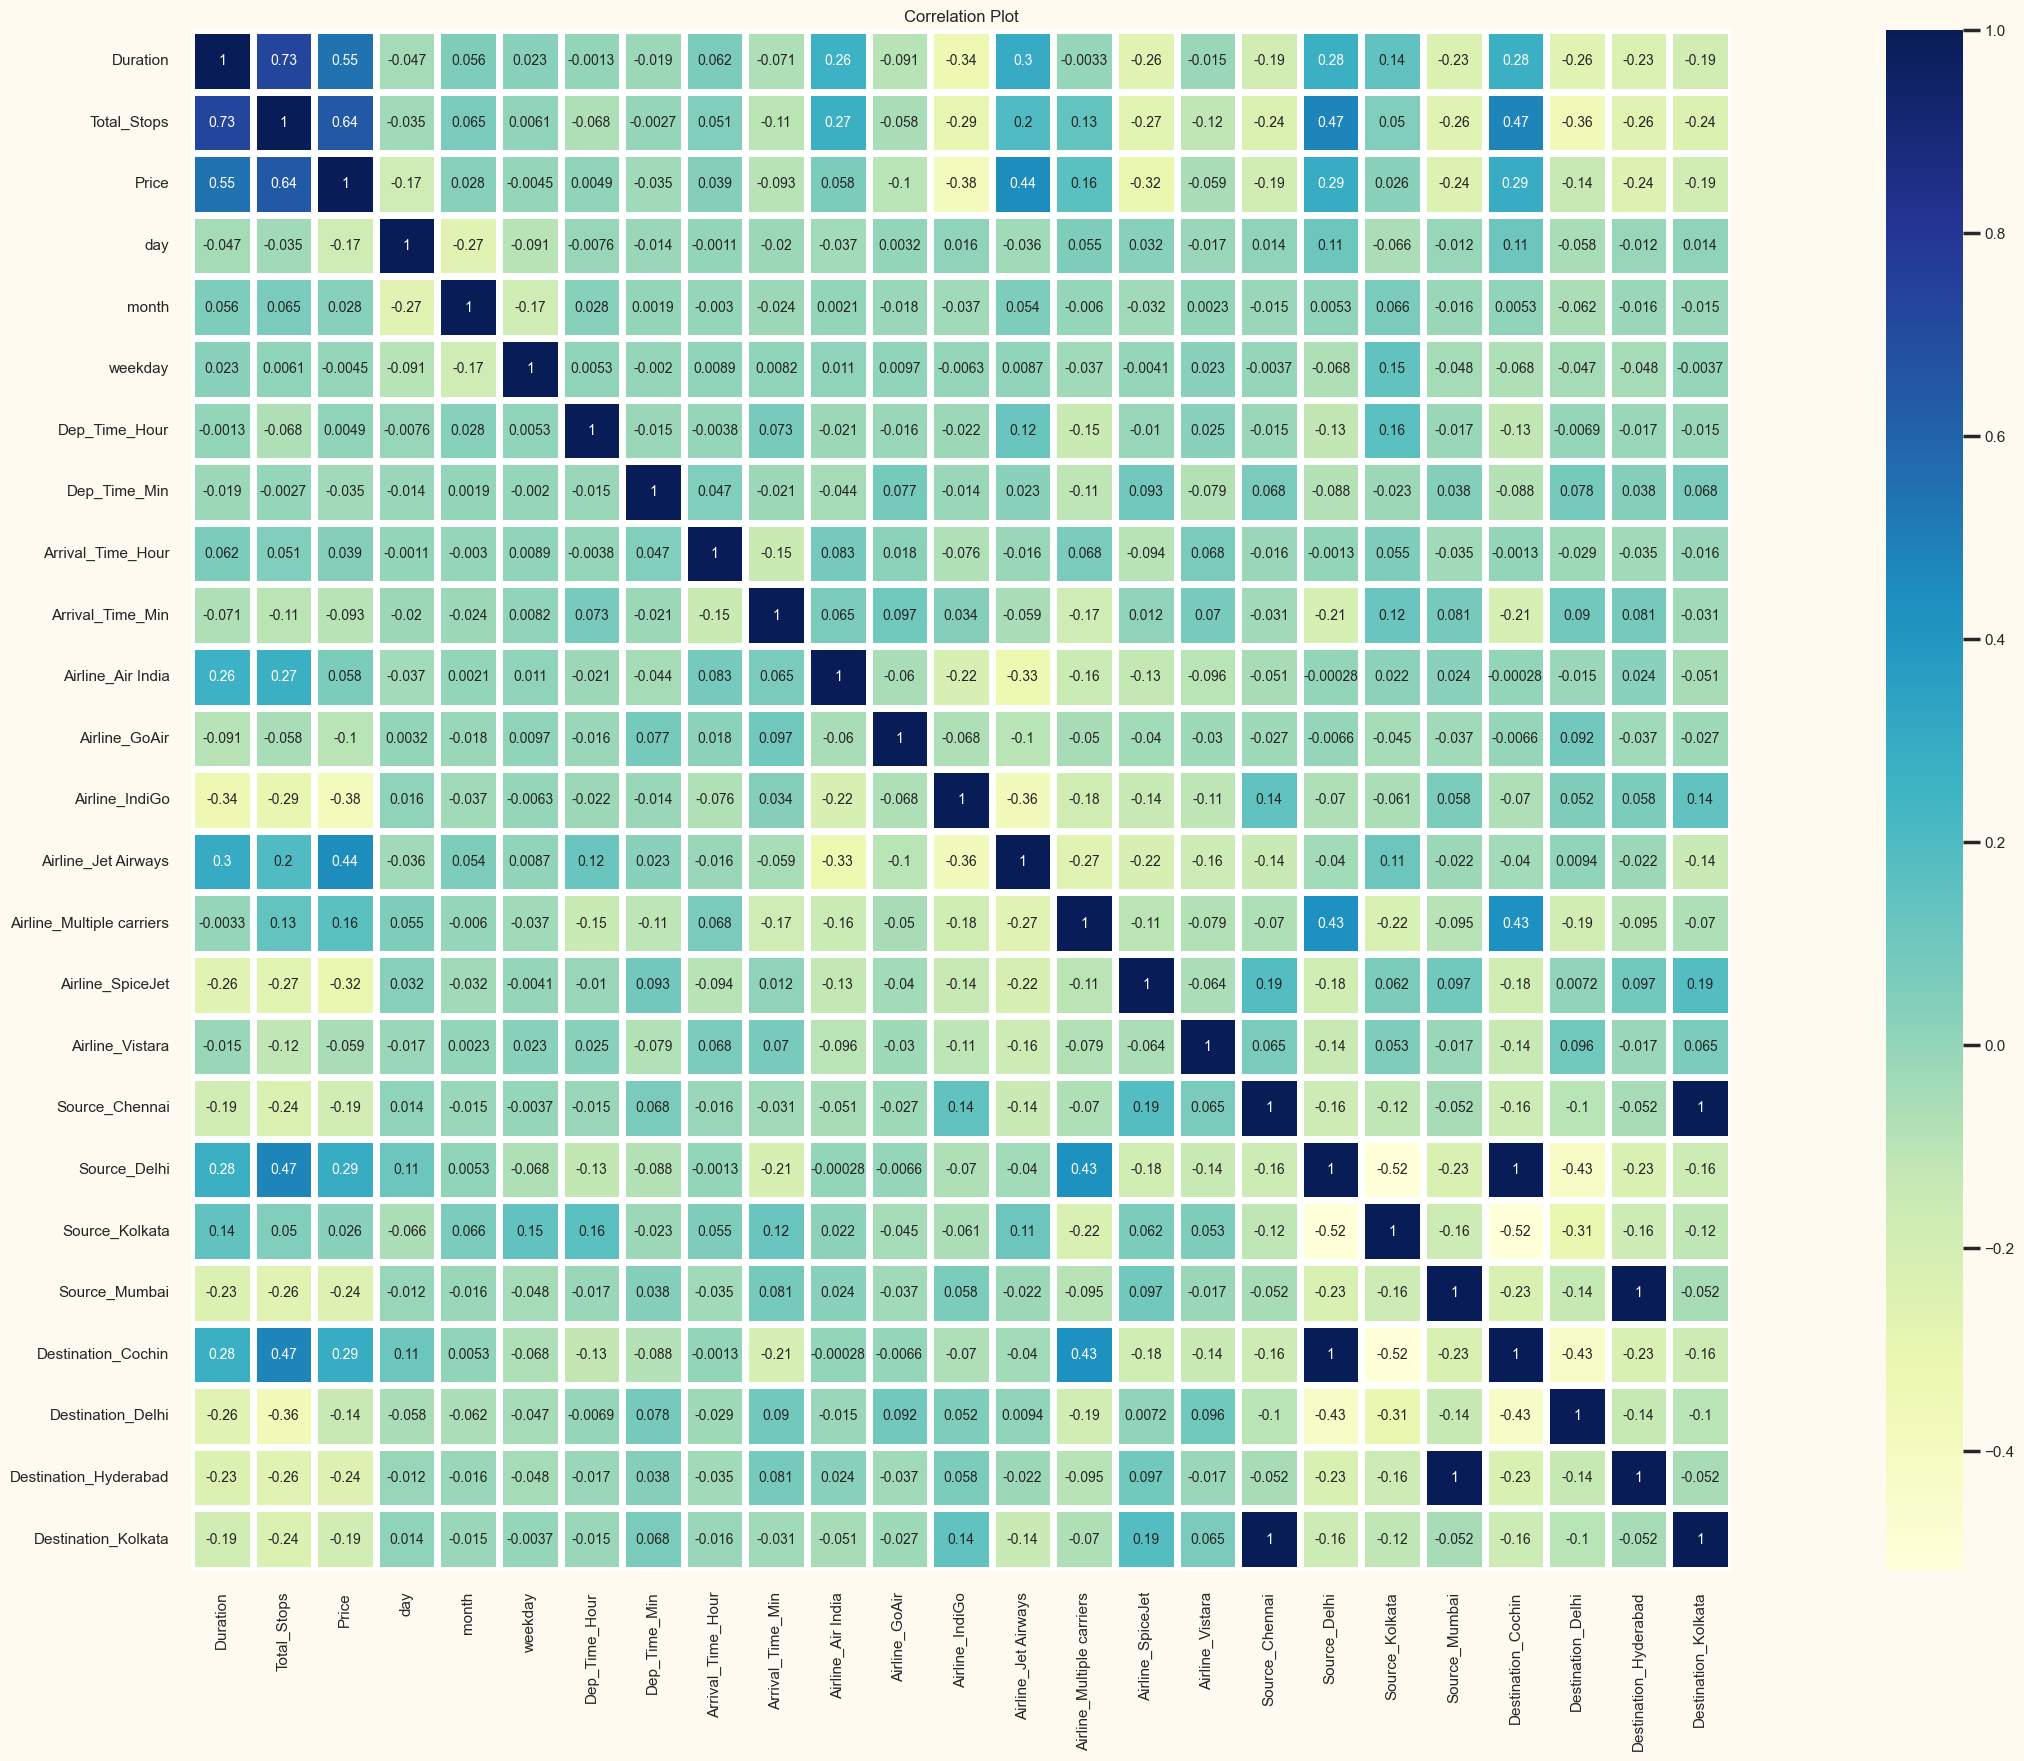

In [61]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df_new.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

### Model Building

In [62]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df_new.drop(['Price'],axis=1)
y=df_new['Price']

In [63]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8369, 24), (2093, 24), (8369,), (2093,))

In [64]:
# Build the Regression / Regressor models

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint

### Model Creation & Evaluation

#### Creating a Function to Train Model using Different Regression Algorithms

In [65]:
r2_value = []
adjusted_r2_value = []
mae_value = []
mse_value = []
rmse_value = []

In [66]:
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred= model.predict(x_train)
    y_test_pred = model.predict(x_test)

    #Metrics Calculation.
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,y_test_pred)
    adjusted_r2 = 1 - ((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
   
    mae_value.append(mae)
    mse_value.append(mse)
    rmse_value.append(rmse)
    r2_value.append(r2)
    adjusted_r2_value.append(adjusted_r2) 
    
    print(f"R2 Score of the {model} model is: ",r2)
    print(f"Adjusted R2 Score of the {model} model is: ",adjusted_r2)
    print()
    print(f"MAE of {model} model is: ",mae)
    print(f"MSE of {model} model is: ",mse)
    print(f"RMSE of {model} model is: ",rmse)
    

    # Scatter plot.
    plt.figure(figsize = (20,6))
    plt.subplot(1,2,1)    
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
    
    # Residual plot.
    plt.subplot(1,2,2)
    sns.distplot(y_test-y_test_pred)
    plt.title('Residual Plot',fontweight="black",size=20,pad=10)
    plt.show()

#### Linear Regression Model

R2 Score of the LinearRegression() model is:  0.5963338939644397
Adjusted R2 Score of the LinearRegression() model is:  0.5916491809350135

MAE of LinearRegression() model is:  2022.8190613728234
MSE of LinearRegression() model is:  7395029.889516012
RMSE of LinearRegression() model is:  2719.3804238311363


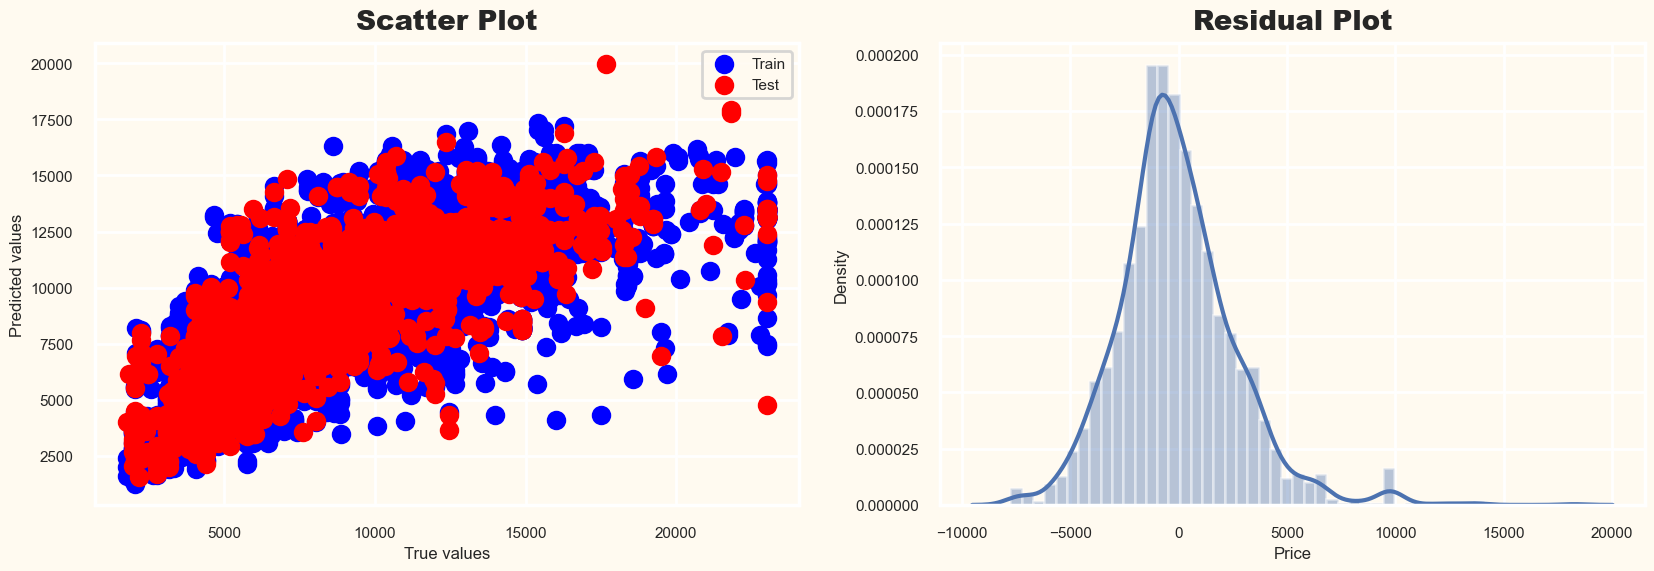

In [67]:
model_evaluation(LinearRegression())

#### Decision Tree

R2 Score of the DecisionTreeRegressor() model is:  0.7301406803897523
Adjusted R2 Score of the DecisionTreeRegressor() model is:  0.7270088507617805

MAE of DecisionTreeRegressor() model is:  1312.6559762701067
MSE of DecisionTreeRegressor() model is:  4943733.706258793
RMSE of DecisionTreeRegressor() model is:  2223.45085537297


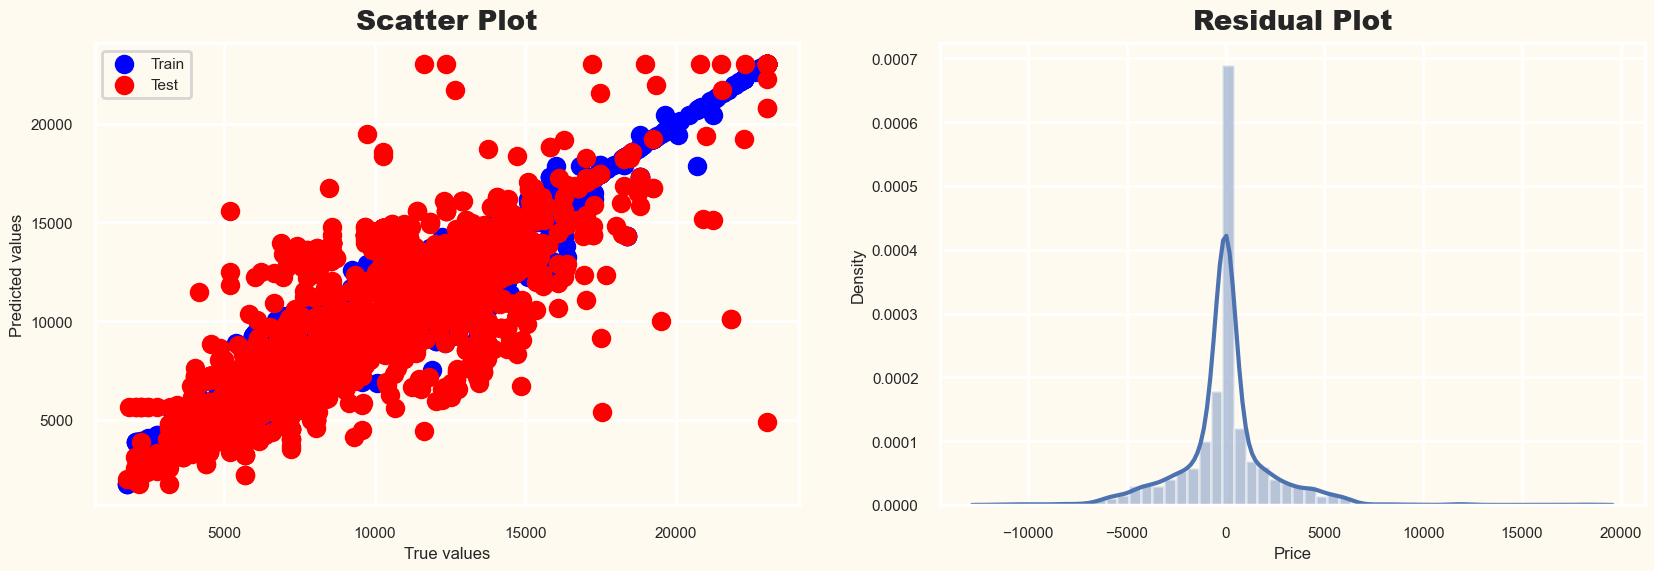

In [68]:
model_evaluation(DecisionTreeRegressor())

#### Random Forest

R2 Score of the RandomForestRegressor() model is:  0.8216544601541713
Adjusted R2 Score of the RandomForestRegressor() model is:  0.8195846859973532

MAE of RandomForestRegressor() model is:  1146.293858631189
MSE of RandomForestRegressor() model is:  3267231.4521883307
RMSE of RandomForestRegressor() model is:  1807.5484646858936


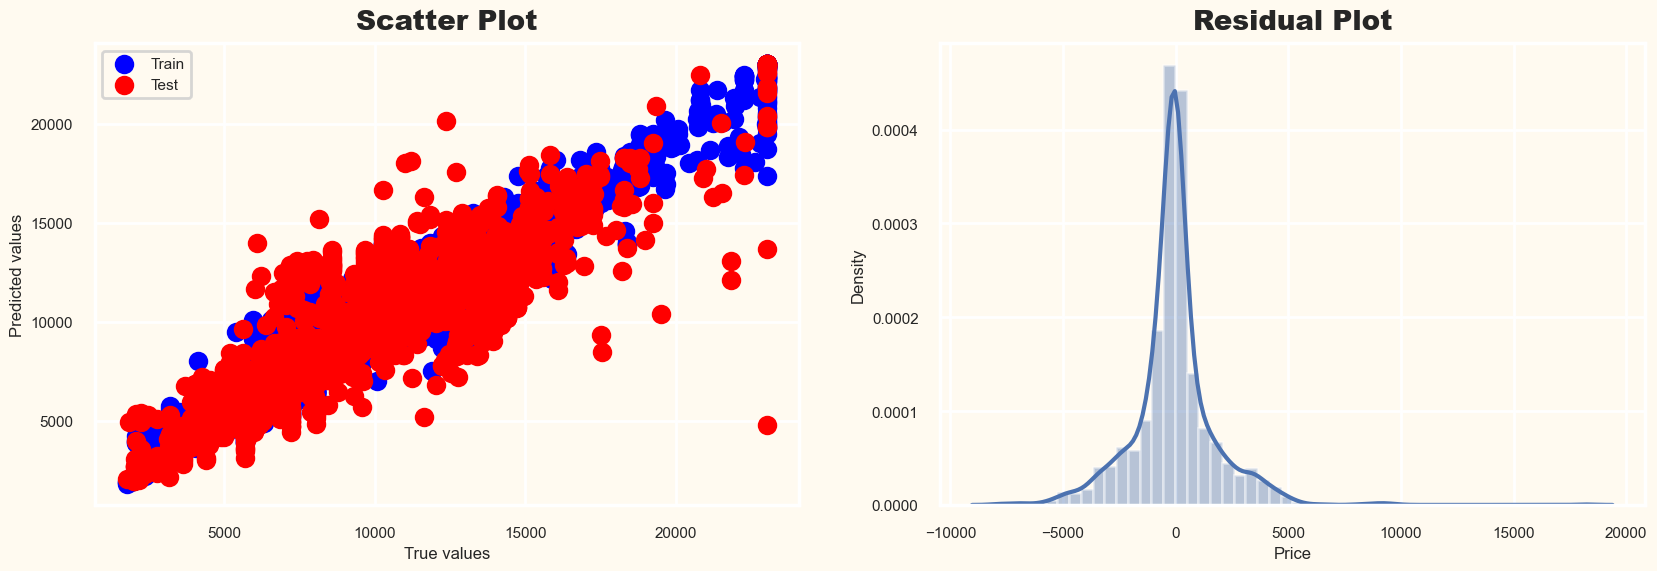

In [69]:
model_evaluation(RandomForestRegressor())

#### Adaboost Regressor

R2 Score of the AdaBoostRegressor() model is:  0.6425384154487908
Adjusted R2 Score of the AdaBoostRegressor() model is:  0.6383899251058367

MAE of AdaBoostRegressor() model is:  2073.7599499109833
MSE of AdaBoostRegressor() model is:  6548578.299207211
RMSE of AdaBoostRegressor() model is:  2559.019011107032


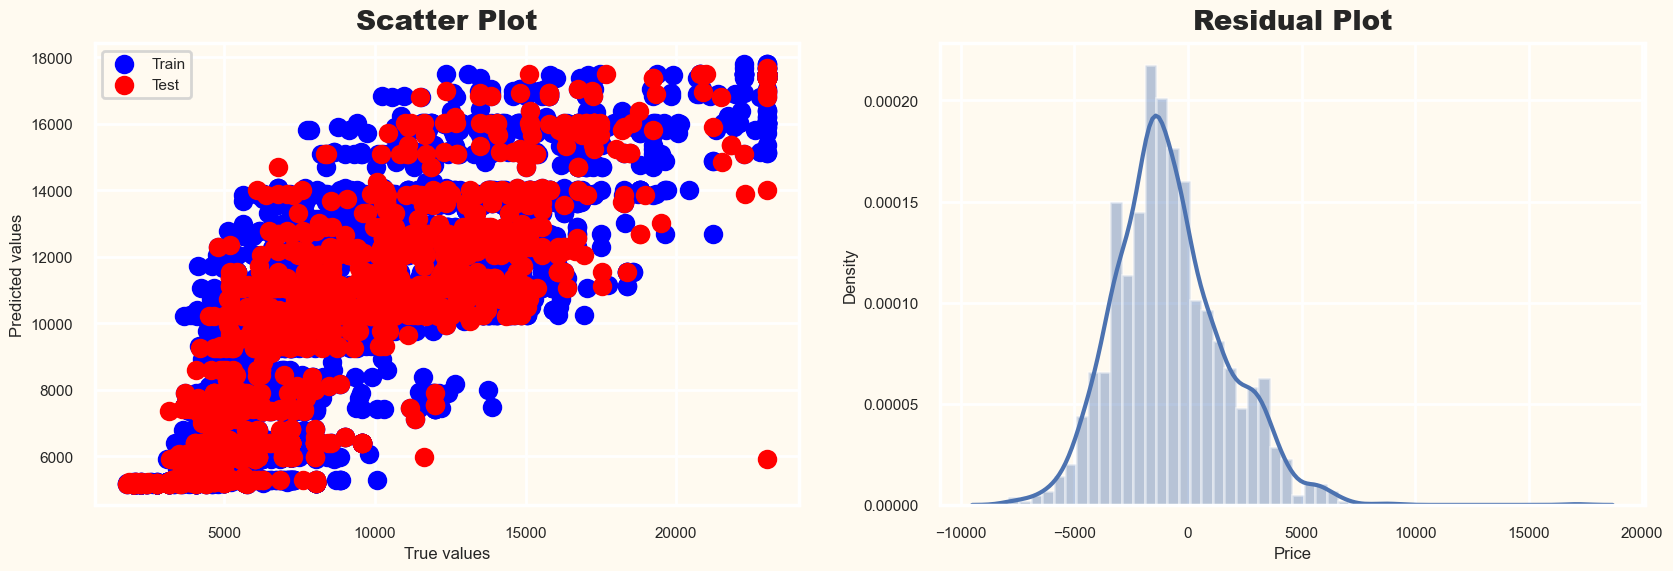

In [70]:
model_evaluation(AdaBoostRegressor())

#### Gradient Boosting

R2 Score of the GradientBoostingRegressor() model is:  0.7952057165327152
Adjusted R2 Score of the GradientBoostingRegressor() model is:  0.7928289937071762

MAE of GradientBoostingRegressor() model is:  1430.437991884839
MSE of GradientBoostingRegressor() model is:  3751763.709656545
RMSE of GradientBoostingRegressor() model is:  1936.947007446653


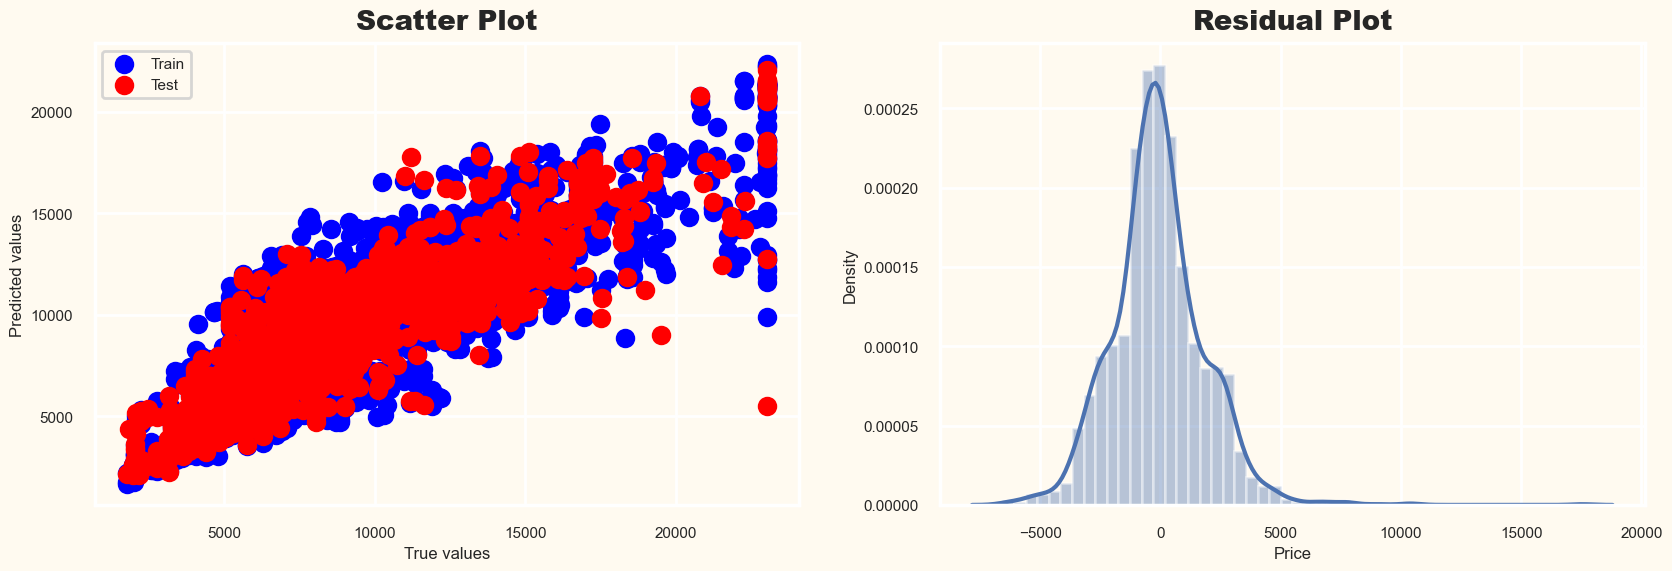

In [71]:
model_evaluation(GradientBoostingRegressor())

#### XGBoost Regressor

R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model is:  0.8601848001859873
Adjusted R2 Score of the XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
    

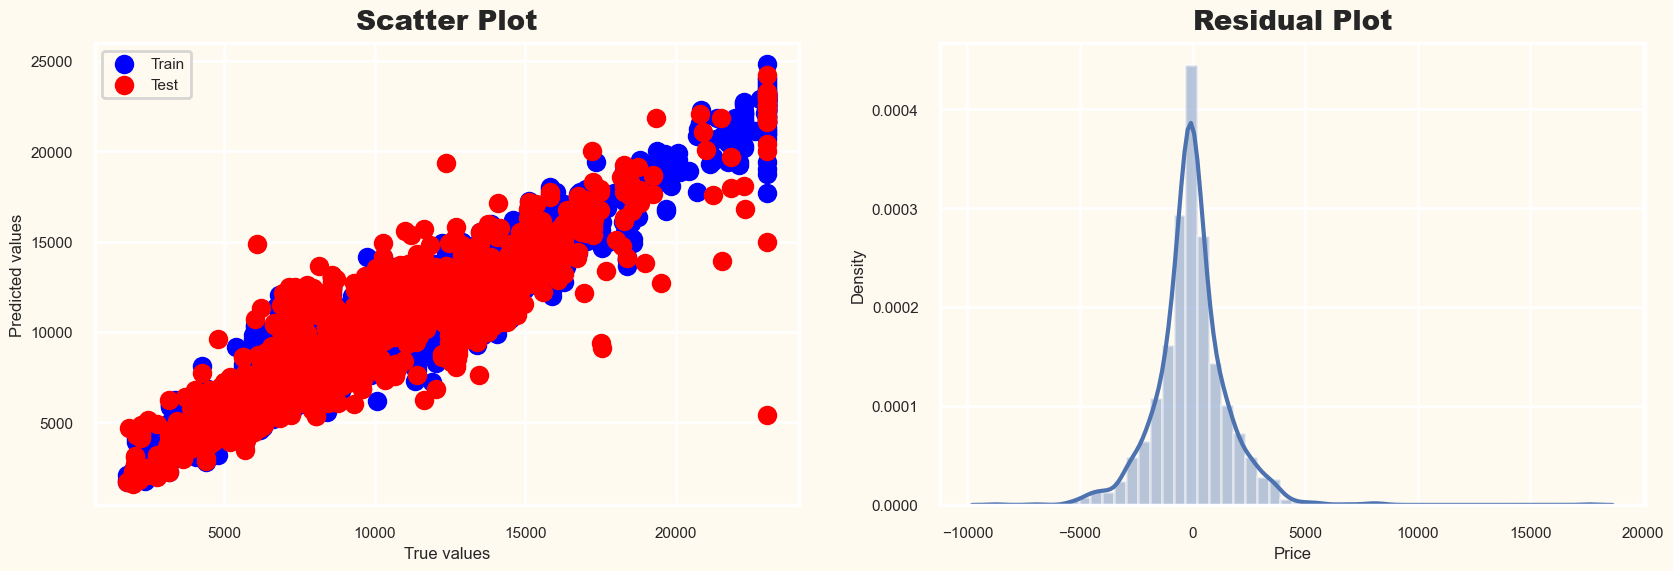

In [72]:
model_evaluation(XGBRegressor())

In [73]:
algos = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","AdaBoostRegressor","GradientBosstRegressor","XGBosstRegressor"]

In [74]:
new_df = pd.DataFrame({"Model":algos,"R2_Score":r2_value,"Adjusted_R2_Score":adjusted_r2_value,
                       "MAE":mae_value,"MSE":mse_value,"RMSE":rmse_value})

In [75]:
new_df

,Model,R2_Score,Adjusted_R2_Score,MAE,MSE,RMSE
0,LinearRegression,0.596334,0.591649,2022.819061,7.395030e+06,2719.380424
1,DecisionTreeRegressor,0.730141,0.727009,1312.655976,4.943734e+06,2223.450855
2,RandomForestRegressor,0.821654,0.819585,1146.293859,3.267231e+06,1807.548465
3,AdaBoostRegressor,0.642538,0.638390,2073.759950,6.548578e+06,2559.019011
4,GradientBosstRegressor,0.795206,0.792829,1430.437992,3.751764e+06,1936.947007
5,XGBosstRegressor,0.860185,0.858562,1096.449645,2.561368e+06,1600.427547


Inference:
    
1. XGBoost Regressor (0.86), RandomForest Regressor (0.82) and Gradient Boost Regressor (0.79) are the top 3 model with highest R2 Score value.  

### Tuning the Model

#### 1. Gradient Boosting Regressor Model.

In [76]:
gbr_model = GradientBoostingRegressor()

In [77]:
# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': np.arange(3, 8),  
    'min_samples_split': np.arange(3, 8), 
    'min_samples_leaf': np.arange(3, 8)
}

In [78]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(gbr_model, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the model to your data
random_search.fit(x_train, y_train)  

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7]),
                                        'min_samples_split': array([3, 4, 5, 6, 7]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   random_state=42)

In [79]:
best_parameters = random_search.best_params_
best_parameters

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'learning_rate': 0.1}

In [80]:
gbr_model = GradientBoostingRegressor(**best_parameters)

In [81]:
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                          n_estimators=300)

In [82]:
y_pred = gbr_model.predict(x_test)

In [83]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8645480912019285
RMSE Score of model is: 1575.2568940923848
Adjusted_R2_Score of model is: 0.8629761154711966


#### 2. XGBoost Model

In [84]:
r2_scorer = make_scorer(r2_score)

# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
    'max_depth': np.arange(3, 11),  
    'min_child_weight': np.arange(1, 11),  
    'subsample': [0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

In [85]:
# Create the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Create the RandomizedSearchCV object with R-squared scoring
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42, scoring=r2_scorer)

# Fit the model to your data
random_search.fit(x_train, y_train) 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_ite

In [86]:
best_parameters = random_search.best_params_
best_parameters

{'subsample': 1.0,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 7,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [87]:
xgb_model = XGBRegressor(**best_parameters)

In [88]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [89]:
y_pred = xgb_model.predict(x_test)

In [90]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8640493800198634
RMSE Score of model is: 1578.1541454217154
Adjusted_R2_Score of model is: 0.8624716165384692


#### 3. RandomForest Regressor

In [91]:
rf_model = RandomForestRegressor()

In [92]:
param_dist = {
    'n_estimators': randint(100, 300, 50),  # Number of trees in the forest
    'max_depth': randint(2, 8),       # Maximum depth of the trees
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(2, 8),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [93]:
# Perform Randomized Search CV
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=10, 
    cv=5, n_jobs=-1, random_state=42
)

In [94]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002336E34F850>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002336E34F370>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002336E3D3E80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002336E418D00>},
                   random_state=42)

In [95]:
best_parameters = random_search.best_params_
best_parameters

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 198}

In [96]:
rf_model = RandomForestRegressor(**best_parameters)

In [98]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=5, n_estimators=198)

In [99]:
y_pred = rf_model.predict(x_test)

In [100]:
print("R2_Score of model is:",r2_score(y_test,y_pred))
print("RMSE Score of model is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adjusted_R2_Score of model is:",1-((1-r2_score(y_test,y_pred))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

R2_Score of model is: 0.8087033286705756
RMSE Score of model is: 1872.0288214324582
Adjusted_R2_Score of model is: 0.8064832512470232


Inference:
    
R2 Score of Models after Tuning:  
1. GradientBoost Regressor: 0.86  
2. XGBoost Regressor : 0.86  
3. RandomForest regressor : 0.80  

### Conclusion

#### XGBoost regressor & GradientBoost Regressor are giving the best result